In [2]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [3]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Explore the dataset's features and target variable
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

# Calculate mean, range, and standard deviation for each feature
stats = diabetes_df.describe().loc[['mean', 'min', 'max', 'std']]

# Print stats
print(stats)

               age           sex           bmi            bp            s1  \
mean -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
min  -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
max   1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   
std   4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   

                s2            s3            s4            s5            s6  \
mean  3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
min  -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
max   1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   
std   4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   

          target  
mean  152.133484  
min    25.000000  
max   346.000000  
std    77.093005  


In [4]:
# Separate features and target
X = diabetes.data
y = diabetes.target

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print shapes of the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (353, 10)
y_train shape: (353,)
X_test shape: (89, 10)
y_test shape: (89,)


In [5]:
# Build a linear regression model
lr_no_pca = LinearRegression()
lr_no_pca.fit(X_train, y_train)

# Make predictions
y_pred_no_pca = lr_no_pca.predict(X_test)

# Calculate mean squared error
mse_no_pca = mean_squared_error(y_test, y_pred_no_pca)
print("Mean Squared Error without PCA:", mse_no_pca)

Mean Squared Error without PCA: 2900.1936284934827


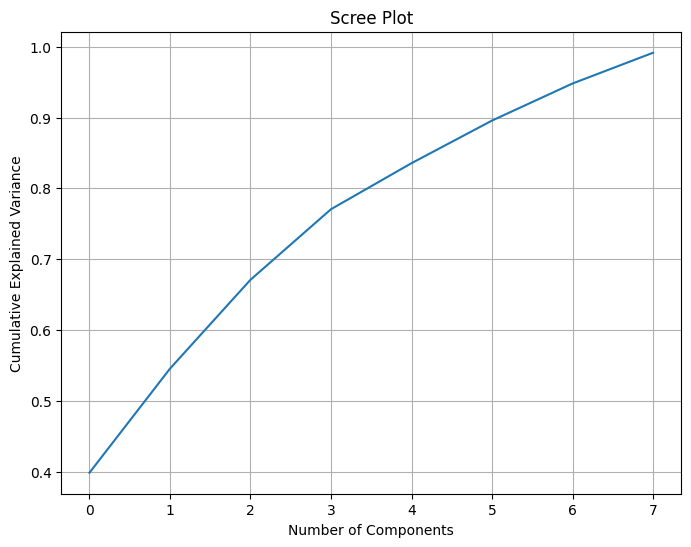

In [6]:
# Apply PCA to the standardized training set
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)

# Plot a scree plot to visualize the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [7]:
# Build a linear regression model using PCA
lr_with_pca = LinearRegression()
lr_with_pca.fit(X_train_pca, y_train)

# Transform the test set using PCA
X_test_pca = pca.transform(X_test)

# Make predictions
y_pred_with_pca = lr_with_pca.predict(X_test_pca)

# Calculate mean squared error
mse_with_pca = mean_squared_error(y_test, y_pred_with_pca)
print("Mean Squared Error with PCA:", mse_with_pca)

Mean Squared Error with PCA: 2884.0049457480823


In [8]:
#Comparison between Mean Squared Error with and without PCA
print("Mean Squared Error without PCA:", mse_no_pca)
print("Mean Squared Error with PCA:", mse_with_pca)

Mean Squared Error without PCA: 2900.1936284934827
Mean Squared Error with PCA: 2884.0049457480823


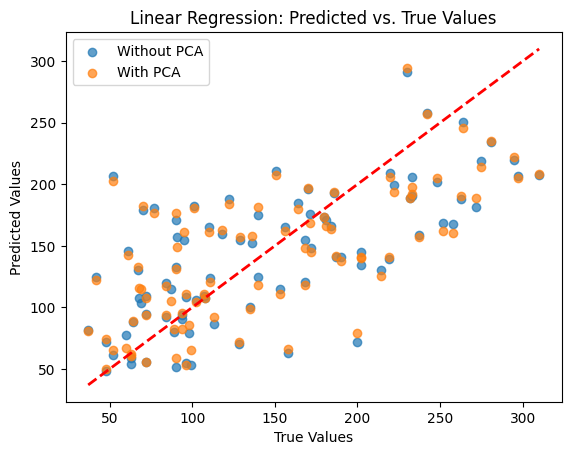

In [9]:
# Visualize predictions with scatter plots
plt.scatter(y_test, y_pred_no_pca, label='Without PCA', alpha=0.7)
plt.scatter(y_test, y_pred_with_pca, label='With PCA', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs. True Values')
plt.legend()
plt.show()